In [18]:
import streamlit as st
import plotly as px
from PIL import Image 
import cv2
print (cv2.__version__)
st.text('hello test 123 does this work?')

# Importing TensorFlow and Keras
# Keras is a High-Level API to build and train models in TensorFlow
import tensorflow as tf
from tensorflow import keras
import pathlib

# Ignore warnings :
#import warnings
#warnings.filterwarnings('ignore')

# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 


# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno 

4.1.2


False

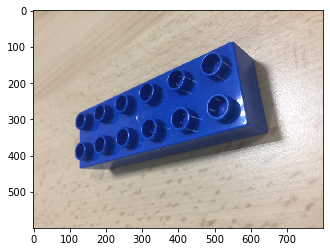

In [19]:
Lego = cv2.imread('Data/02300 BLUE/02300_BLUE_1.jpg')

plt.imshow(cv2.cvtColor(Lego, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/Lego-orig.jpg', Lego)

False

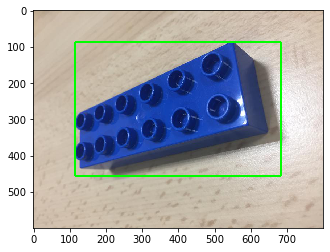

In [20]:
# get binary image and apply Gaussian blur
Lego_gray = cv2.cvtColor(Lego, cv2.COLOR_BGR2GRAY)
Lego_preprocessed = cv2.GaussianBlur(Lego_gray, (5, 5), 0)

_, Lego_binary = cv2.threshold(Lego_preprocessed, 130, 255, cv2.THRESH_BINARY)

Lego_binary = cv2.bitwise_not(Lego_binary)

# find contours
Lego_contours, _ = cv2.findContours(Lego_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
coins_and_contours = np.copy(Lego)

# find contours of large enough area
min_Lego_area = 60
large_contours = [cnt for cnt in Lego_contours if cv2.contourArea(cnt) > min_Lego_area]


bounding_img = np.copy(Lego)
# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/Lego-bounding.jpg', bounding_img)

In [64]:
# display picture
Fotos = { "02300BL": "http://11500991.pxl-ea-ict.be/SmartSys/02300%20BLUE/02300_BLUE_1.jpg",
        "3198LG": "http://11500991.pxl-ea-ict.be/SmartSys/3198%20LIGHTGREEN/3198_lightgreen_3.jpg",
        "3437BR": "http://11500991.pxl-ea-ict.be/SmartSys/3437%20BROWN/3437_brown_2.jpg",
        "3437GR": "http://11500991.pxl-ea-ict.be/SmartSys/3437%20GREEN/3437_green_1.jpg",
        "3437LB": "http://11500991.pxl-ea-ict.be/SmartSys/3437%20LIGHTBLUE/jason/3437_lightblue_5.jpg",
        "6437YE": "http://11500991.pxl-ea-ict.be/SmartSys/6474%20YELLOW/3437_yellow_3.jpg"}

Foto = list(Fotos.keys())
Foto = st.sidebar.selectbox("Kies Foto", list(Fotos.keys()),0)
show.Image(Fotos[Foto], use_column_width= True, caption= Fotos[Foto])